In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

SEED = 42
np.random.seed(SEED)

df_data = pd.read_excel('../../0_datasets/clustering/dados_feijao.xlsx')
df_data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
# df_data.head()
# df_data.info()
# df_data.describe()

X = df_data.iloc[:, [i for i in range(16)]].values
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)


In [3]:
kmeans = KMeans(n_clusters=7)
rotulos_kmeans = kmeans.fit_predict(X_normalizado)

rotulos_kmeans[:5]


array([2, 2, 2, 2, 2], dtype=int32)

### Encontrando melhor agrupamento

In [4]:
wcss = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_normalizado)
    wcss.append(kmeans.inertia_)

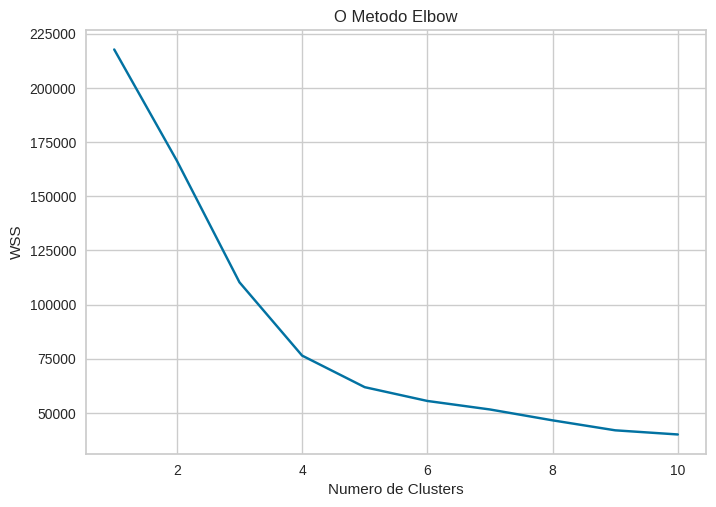

In [5]:

plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS')
plt.show()

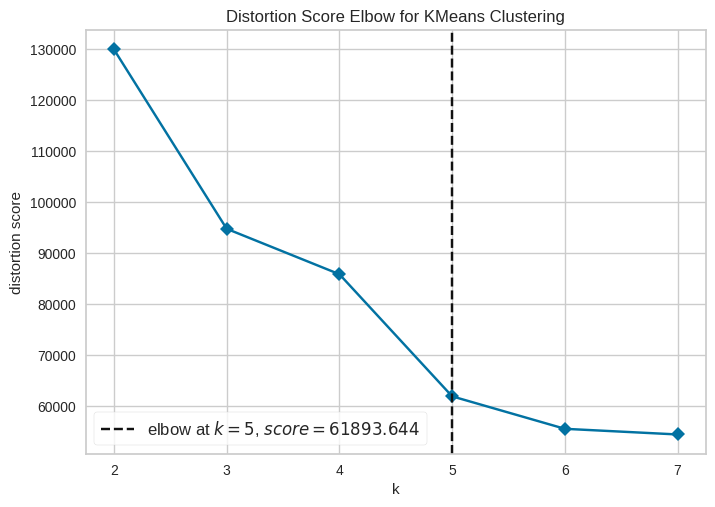

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
grafico = KElbowVisualizer(kmeans, k=(2, 8), timings=False)
grafico.fit(X_normalizado)
grafico.show()

In [7]:
kmeans_mealhorado = KMeans(n_clusters=4, random_state=42)
rotulos_kmeans_mealhorado = kmeans_mealhorado.fit_predict(X_normalizado)

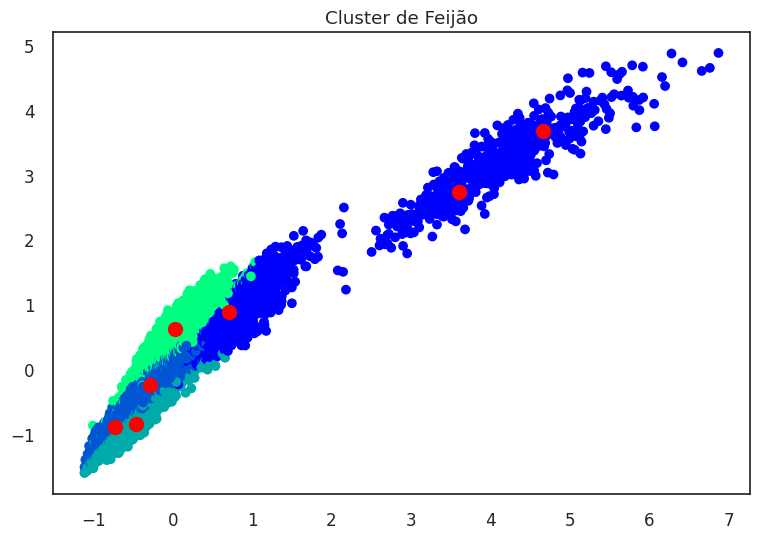

In [9]:
sns.set(style='white', rc = {'figure.figsize':(9,6)}, font_scale=1.1)


plt.scatter(X_normalizado[:, 0], X_normalizado[: , 2], c=rotulos_kmeans_mealhorado, cmap='winter')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 2], 
            s=100, 
            c='red')

plt.title('Dados agrupados com K-Means')
plt.show()